In [105]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.optimizer.utils import l_norm
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 1/np.sqrt(17), kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 1/np.sqrt(4), kernel_regularizer = 0.001)

    print("norm_w0: {}".format(l_norm(model.weights)))
    print("sum_w0: {}".format([np.sum(np.square(x)) for x in model.weights]))
    model.set_optimizer(optimizer)
    start = time.time()
    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)
    end = time.time()
    return model, (end - start)

def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

# Monk 2 ln_maxiter = 10

In [107]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 189
ln_maxiter = 10
results = []

Load Monk DataSet


In [108]:
#############################
#          NCG pr
#############################

optimizer = NCG(beta_method="pr", c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 0.09115715839364258 | ng: 8.448834907889065 | ls conv: y, it: 0, time: 0.0021 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0125 - loss_train: 0.2474917425514084 - loss_val: 0
| beta: 0.9444691550833718 | alpha: 0.0011073472327028807 | ng: 5.0583770723692165 | ls conv: n, it: 0, time: 0.0030 | zoom used: y, conv: n, it: 10|
Epoch: 2 - time: 0.0060 - loss_train: 0.24767470429798022 - loss_val: 0
| beta: 0.00596517008957017 | alpha: 0.08826146201322468 | ng: 5.088371050034229 | ls conv: y, it: 0, time: 0.0021 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0047 - loss_train: 0.23677110466172335 - loss_val: 0
| beta: 0.43405875777391195 | alpha: 0.0012036061751007252 | ng: 1.7074034497363024 | ls conv: n, it: 0, time: 0.0054 | zoom used: y, conv: n, it: 10|
Epoch: 4 - time: 0.0079 - loss_train: 0.2367808940348855 - loss_val: 0
| beta: 0.006711208576079095 | alpha: 0.086

In [109]:
#############################
#          NCG pr+
#############################

optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 0.09115715839364258 | ng: 8.448834907889065 | ls conv: y, it: 0, time: 0.0025 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0105 - loss_train: 0.2474917425514084 - loss_val: 0
| beta: 0.9444691550833718 | alpha: 0.0011073472327028807 | ng: 5.0583770723692165 | ls conv: n, it: 0, time: 0.0094 | zoom used: y, conv: n, it: 10|
Epoch: 2 - time: 0.0159 - loss_train: 0.24767470429798022 - loss_val: 0
| beta: 0.00596517008957017 | alpha: 0.08826146201322468 | ng: 5.088371050034229 | ls conv: y, it: 0, time: 0.0020 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0046 - loss_train: 0.23677110466172335 - loss_val: 0
| beta: 0.43405875777391195 | alpha: 0.0012036061751007252 | ng: 1.7074034497363024 | ls conv: n, it: 0, time: 0.0099 | zoom used: y, conv: n, it: 10|
Epoch: 4 - time: 0.0134 - loss_train: 0.2367808940348855 - loss_val: 0
| beta: 0.006711208576079095 | alpha: 0.086

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


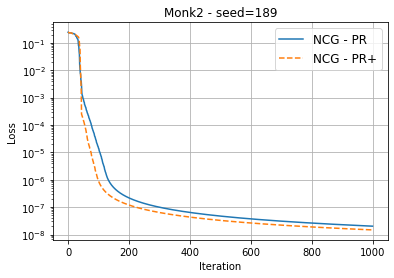

In [110]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')
plt.savefig('./plot/monk2_pr_pr+_1.eps', format='eps')
plt.show()


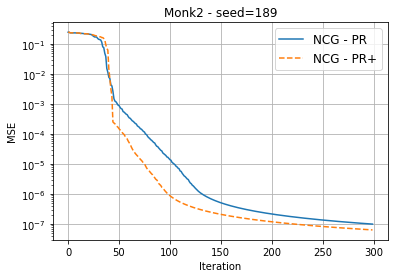

In [111]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_pr["loss_mse"][:zoom], linestyle='-')
plt.plot(h_pr_plus["loss_mse"][:zoom], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')    
plt.show()

# Monk 2 ln_maxiter = 100

In [112]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 189
ln_maxiter = 100
results = []

Load Monk DataSet


In [113]:
#############################
#          NCG pr
#############################

optimizer = NCG(beta_method="pr", c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 0.09115715839364258 | ng: 8.448834907889065 | ls conv: y, it: 0, time: 0.0015 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0060 - loss_train: 0.2474917425514084 - loss_val: 0
| beta: 0.9444691550833718 | alpha: 0.0011073472327028807 | ng: 5.0583770723692165 | ls conv: n, it: 0, time: 0.0050 | zoom used: y, conv: n, it: 10|
Epoch: 2 - time: 0.0081 - loss_train: 0.24767470429798022 - loss_val: 0
| beta: 0.00596517008957017 | alpha: 0.08826146201322468 | ng: 5.088371050034229 | ls conv: y, it: 0, time: 0.0017 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0038 - loss_train: 0.23677110466172335 - loss_val: 0
| beta: 0.43405875777391195 | alpha: 0.0012036061751007252 | ng: 1.7074034497363024 | ls conv: n, it: 0, time: 0.0076 | zoom used: y, conv: n, it: 10|
Epoch: 4 - time: 0.0109 - loss_train: 0.2367808940348855 - loss_val: 0
| beta: 0.006711208576079095 | alpha: 0.086

In [114]:
#############################
#          NCG pr+
#############################

optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 0.09115715839364258 | ng: 8.448834907889065 | ls conv: y, it: 0, time: 0.0018 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0076 - loss_train: 0.2474917425514084 - loss_val: 0
| beta: 0.9444691550833718 | alpha: 0.0011073472327028807 | ng: 5.0583770723692165 | ls conv: n, it: 0, time: 0.0050 | zoom used: y, conv: n, it: 10|
Epoch: 2 - time: 0.0073 - loss_train: 0.24767470429798022 - loss_val: 0
| beta: 0.00596517008957017 | alpha: 0.08826146201322468 | ng: 5.088371050034229 | ls conv: y, it: 0, time: 0.0019 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0049 - loss_train: 0.23677110466172335 - loss_val: 0
| beta: 0.43405875777391195 | alpha: 0.0012036061751007252 | ng: 1.7074034497363024 | ls conv: n, it: 0, time: 0.0038 | zoom used: y, conv: n, it: 10|
Epoch: 4 - time: 0.0064 - loss_train: 0.2367808940348855 - loss_val: 0
| beta: 0.006711208576079095 | alpha: 0.086

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


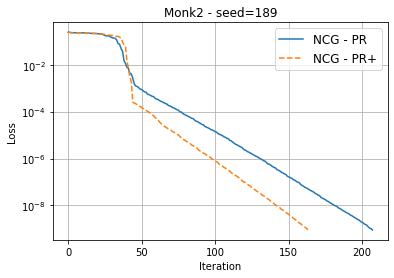

In [115]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')  
plt.savefig('./plot/monk2_pr_pr+_2.eps', format='eps')
plt.show()

# Monk 1 ln_maxiter = 100 seed 412

In [47]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

    model.set_optimizer(optimizer)

    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)

    return model

def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

In [65]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 412 #206 #874 #206 #56
ln_maxiter = 100
results = []

Load Monk DataSet


In [70]:
#############################
#          NCG pr
#############################
optimizer = NCG(beta_method="pr", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.3054750560914667
sum_w0: [1.329475931677592, 0.3747891903994264]
| beta: 0 | alpha: 0.06792732334980235 | ng: 4.250455296820267 | ls conv: y, it: 0, time: 0.0044 | zoom used: y, conv: y, it: 4|
Epoch: 1 - time: 0.0085 - loss_train: 0.2506750261289634 - loss_val: 0
| beta: 0.0669155816307934 | alpha: 2.0 | ng: 0.7744569730932894 | ls conv: y, it: 1, time: 0.0025 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0063 - loss_train: 0.24151512929233104 - loss_val: 0
| beta: 5.2588987640786575 | alpha: 1.0 | ng: 1.8289581338514342 | ls conv: y, it: 0, time: 0.0005 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0041 - loss_train: 0.20617386676232966 - loss_val: 0
| beta: 19.884124489945247 | alpha: 0.0921564454290592 | ng: 8.087807250770986 | ls conv: y, it: 0, time: 0.0028 | zoom used: y, conv: y, it: 2|
Epoch: 4 - time: 0.0045 - loss_train: 0.19318757072953613 - loss_val: 0
| beta: -0.1709443181532697 | alpha: 0.20488774651168226 | ng: 4.089048178875652 | ls

In [71]:
#############################
#          NCG pr+
#############################
optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.3054750560914667
sum_w0: [1.329475931677592, 0.3747891903994264]
| beta: 0 | alpha: 0.06792732334980235 | ng: 4.250455296820267 | ls conv: y, it: 0, time: 0.0050 | zoom used: y, conv: y, it: 4|
Epoch: 1 - time: 0.0092 - loss_train: 0.2506750261289634 - loss_val: 0
| beta: 0.0669155816307934 | alpha: 2.0 | ng: 0.7744569730932894 | ls conv: y, it: 1, time: 0.0040 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0065 - loss_train: 0.24151512929233104 - loss_val: 0
| beta: 5.2588987640786575 | alpha: 1.0 | ng: 1.8289581338514342 | ls conv: y, it: 0, time: 0.0005 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0081 - loss_train: 0.20617386676232966 - loss_val: 0
| beta: 19.884124489945247 | alpha: 0.0921564454290592 | ng: 8.087807250770986 | ls conv: y, it: 0, time: 0.0035 | zoom used: y, conv: y, it: 2|
Epoch: 4 - time: 0.0065 - loss_train: 0.19318757072953613 - loss_val: 0
| beta: 0 | alpha: 0.20886818027550502 | ng: 4.089048178875652 | ls conv: y, it: 0, t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


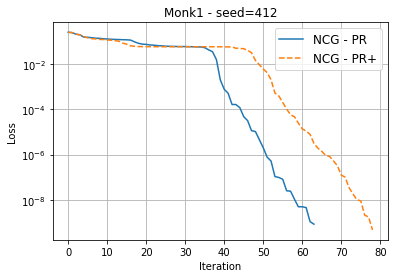

In [73]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./plot/monk1_pr_pr+_1.eps', format='eps')
plt.show()


# Monk 1 ln_maxiter = 100 seed 206

In [75]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 206 #874 #206 #56
ln_maxiter = 100
results = []

Load Monk DataSet


In [76]:
#############################
#          NCG pr
#############################
optimizer = NCG(beta_method="pr", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.1639740610925031
sum_w0: [1.0965973470231707, 0.2582382678730037]
| beta: 0 | alpha: 0.08763397759271441 | ng: 3.0097771399527145 | ls conv: y, it: 0, time: 0.0028 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0075 - loss_train: 0.2493590970577835 - loss_val: 0
| beta: 0.27284700455380145 | alpha: 4.0 | ng: 1.0161793374608217 | ls conv: y, it: 2, time: 0.0016 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0034 - loss_train: 0.2272184555772718 - loss_val: 0
| beta: 52.67620250734467 | alpha: 0.09237525160321279 | ng: 7.69479986132939 | ls conv: y, it: 0, time: 0.0022 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0046 - loss_train: 0.16665923661354562 - loss_val: 0
| beta: -0.0166161007946236 | alpha: 1.0 | ng: 2.7369342842589037 | ls conv: y, it: 0, time: 0.0005 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0073 - loss_train: 0.15480051567586164 - loss_val: 0
| beta: 4.258978273980507 | alpha: 0.08827596334234553 | ng: 5.476407704136075 | ls

In [77]:
#############################
#          NCG pr+
#############################
optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.1639740610925031
sum_w0: [1.0965973470231707, 0.2582382678730037]
| beta: 0 | alpha: 0.08763397759271441 | ng: 3.0097771399527145 | ls conv: y, it: 0, time: 0.0020 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0061 - loss_train: 0.2493590970577835 - loss_val: 0
| beta: 0.27284700455380145 | alpha: 4.0 | ng: 1.0161793374608217 | ls conv: y, it: 2, time: 0.0028 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0052 - loss_train: 0.2272184555772718 - loss_val: 0
| beta: 52.67620250734467 | alpha: 0.09237525160321279 | ng: 7.69479986132939 | ls conv: y, it: 0, time: 0.0061 | zoom used: y, conv: y, it: 2|
Epoch: 3 - time: 0.0158 - loss_train: 0.16665923661354562 - loss_val: 0
| beta: 0 | alpha: 0.5033434570867009 | ng: 2.7369342842589037 | ls conv: y, it: 0, time: 0.0013 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0060 - loss_train: 0.14022677002511386 - loss_val: 0
| beta: 0.858382309704066 | alpha: 0.08879793942156203 | ng: 2.5758795997802344 | ls c

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


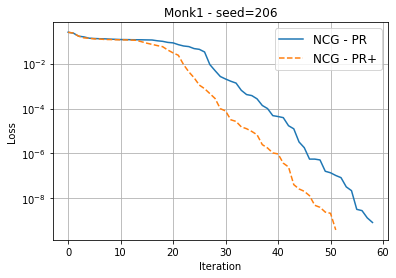

In [79]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./plot/monk1_pr_pr+_2.eps', format='eps')
plt.show()